In [1]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [4]:
df = pd.read_csv("worker_obj_qualities.csv")
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [189]:
def bucketize(data,Nbuckets):
    delta = (max(data)-min(data))/Nbuckets
    bucketized_data = []
    start=0
    end=delta
    for val in data:
        start=0
        end=delta
        #print "val: ",val
        for i in range(Nbuckets+3):
            #print start,end
            if val<=start and i==0:
                bucketized_data.append(0)
            if val>=start and val<end:
                #print"added"
                bucketized_data.append(start)
                break
            else:
                start=end
                end+=delta
            if i==Nbuckets+2:
                bucketized_data.append(end)
    #print len(bucketized_data),len(data)
    assert len(bucketized_data)==len(data)
    return bucketized_data

In [210]:
def scatterplot(df,x_attr,y_attr,z_attr,z_data="",bucketize=True,cmap = plt.cm.rainbow):
    fig=plt.figure()

    
    plt.xlim(0,1.03)
    plt.ylim(0,1.03)
    plt.xlabel(x_attr,fontsize=14)
    plt.ylabel(y_attr,fontsize=14)
    plt.title(z_attr,fontsize=15)
    if bucketize:
        bounds = sort(list(set(bucketized_data)))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        plt.scatter(df[x_attr],df[y_attr],c=z_data,edgecolors='none',alpha=0.7,cmap=cmap,norm=norm)        
        ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
        matplotlib.colorbar.ColorbarBase(ax2,cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)#, format='%1i')
    else:
        plt.scatter(df[x_attr],df[y_attr],c=df[z_attr],edgecolors='none',alpha=0.7,cmap=cmap)
        plt.colorbar()
        plt.clim(0,1)

In [7]:
# b = plt.hist(df[z_attr])
# a = plt.hist(bucketized_data)

#### PR scatterplot with z=Q1 continuous

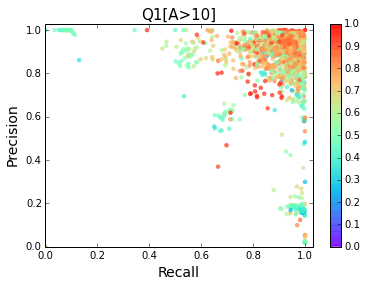

In [116]:
scatterplot(df,"Recall","Precision","Q1[A>10]",bucketize=False)

#### PR scatterplot with z=Q1 bucket = 5 

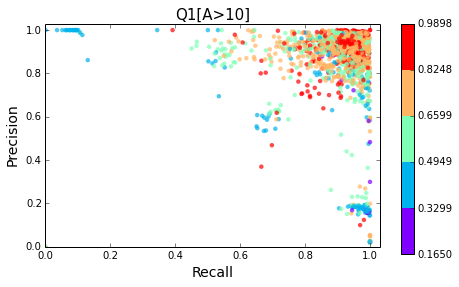

In [117]:
z_attr="Q1[A>10]"
bucketized_data = bucketize(df[z_attr],5)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

#### PR scatterplot with z=Q1 bucket = 3

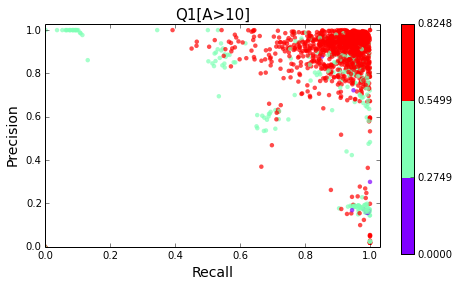

In [190]:
z_attr="Q1[A>10]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

$\therefore$ Qualitatively, Q1 high for good workers, bad for bad workers, but note that there is a spread and some purple (bad Q1) that have decent PR.

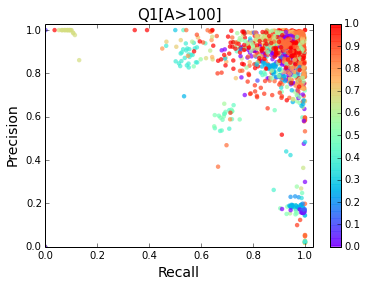

In [119]:
scatterplot(df,"Recall","Precision","Q1[A>100]",bucketize=False)

When you increase the area threshold, there are more good workers who have low Q1 because they didn't pick one of the large area tiles '

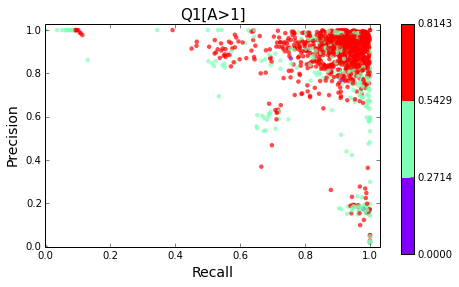

In [120]:
z_attr="Q1[A>1]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

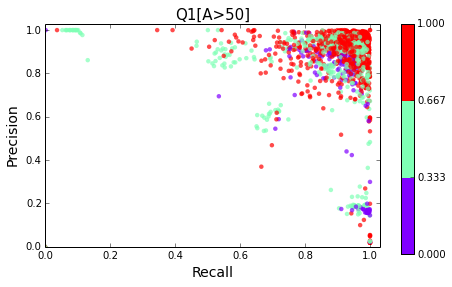

In [121]:
z_attr="Q1[A>50]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

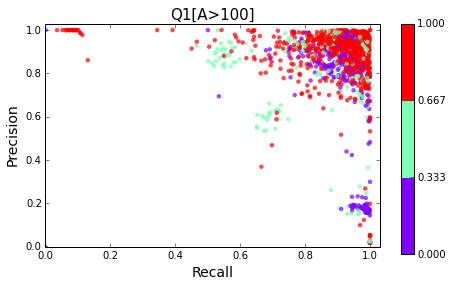

In [122]:
z_attr="Q1[A>100]"
bucketized_data = bucketize(df[z_attr],3)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

### How are Q1, Q2 correlated and how does that relationship change with a*? 

$\therefore$ for small A*, strong correlation between Q1 and Q2. Because the tiles are generally small, if a worker is good, he would likely get most of the small and big tiles A~1 correctly. But when the area threshold is high, small tiles are more or less guessing (variance is ~uniform across all Q1s)

---------------------------------------------
Regression x=['Q1[A>1]'];y=['Q2[A<1]']
Coefficients:  [[ 0.78502869]]
Mean squared error: 0.01
R^2: 0.62
---------------------------------------------
Regression x=['Q1[A>10]'];y=['Q2[A<10]']
Coefficients:  [[ 0.30169736]]
Mean squared error: 0.01
R^2: 0.21
---------------------------------------------
Regression x=['Q1[A>50]'];y=['Q2[A<50]']
Coefficients:  [[ 0.10120454]]
Mean squared error: 0.01
R^2: 0.07
---------------------------------------------
Regression x=['Q1[A>100]'];y=['Q2[A<100]']
Coefficients:  [[ 0.07946036]]
Mean squared error: 0.01
R^2: 0.03


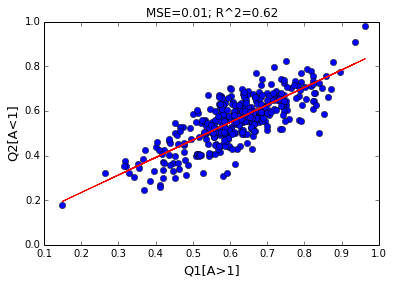

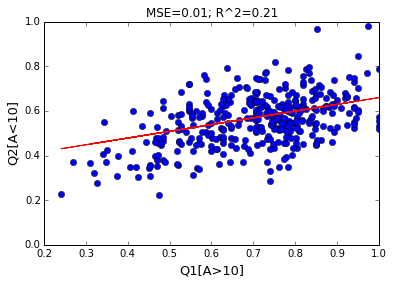

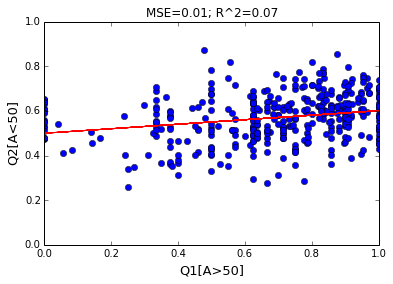

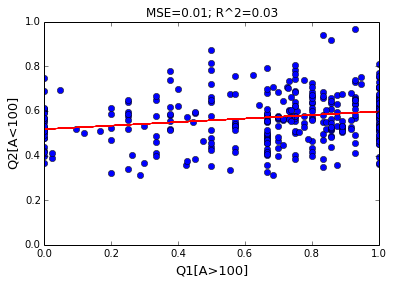

In [38]:
for astar in [1,10,50,100]:
    regression_results( ["Q1[A>{}]".format(astar)],["Q2[A<{}]".format(astar)],PLOT=True)

## Jaccard index: accounts for both P and R characteristics 

In [40]:
df.head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
0,1,75,0.492954,0.452618,0.502315,0.500000,0.492850,0.375,0.493176,0.25,0.493183,0.185230,0.951235
1,1,114,0.348286,0.320449,0.354745,0.419355,0.347235,0.375,0.348235,0.25,0.348378,0.183556,0.992826
2,1,116,0.641146,0.593516,0.652199,0.483871,0.643470,0.375,0.641647,0.25,0.641514,0.190723,0.962686
3,1,118,0.466416,0.498753,0.458912,0.483871,0.466158,0.375,0.466588,0.25,0.466620,0.187262,0.949083
4,1,133,0.268436,0.265586,0.269097,0.193548,0.269542,0.125,0.268706,0.25,0.268453,0.174196,0.980233


In [54]:
def compute_worker_lst_jaccard_obj(objid,worker_lst,EXCLUDE_BBG=True):
    # List of Jaccard Index (IOU) of given list of workers
    jaccard_lst = []

    objBBs = bb_info[bb_info.object_id==objid]
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    for worker_id in worker_lst:
        bb = objBBs[objBBs["worker_id"]==worker_id]
        oid = bb["object_id"]
        bbx_path= bb["x_locs"].values[0]
        bby_path= bb["y_locs"].values[0]
        worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
        jaccard = intersection([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])/union([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])
        jaccard_lst.append(jaccard)
    return jaccard_lst

In [236]:
Qj=pkl.load(open("Qj.pkl",'r'))
worker_obj_tbl = Qj
Athres_lst = [1,10,50,100]
for Athres in Athres_lst:
    Qj12=pkl.load(open("Qj12_A>{}.pkl".format(Athres),'r'))
    Qj12=Qj12.rename(columns = {'Q1':'Q1[A>{}]'.format(Athres),'Q2':'Q2[A<{}]'.format(Athres)})
    worker_obj_tbl =worker_obj_tbl.merge(Qj12)
p_lst = []
r_lst = []
jaccard_lst = []
for objid in list(set(worker_obj_tbl.object_id)):
    workers = list(worker_obj_tbl[worker_obj_tbl["object_id"]==objid].worker_id)
    j = compute_worker_lst_jaccard_obj(objid,workers)
    jaccard_lst.extend(j)
    p,r = compute_worker_lst_PR_obj(objid,workers)
    p_lst.extend(p)
    r_lst.extend(r)
worker_obj_tbl["Precision"]=p_lst
worker_obj_tbl["Recall"]=r_lst
worker_obj_tbl["Jaccard"]=jaccard_lst
worker_obj_tbl.to_csv("worker_obj_qualities.csv",index=None)

In [65]:
df = pd.read_csv("worker_obj_qualities.csv")
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>1]']
Coefficients:  [[ 0.19769466]]
Mean squared error: 0.01
R^2: 0.14
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>10]']
Coefficients:  [[ 0.35607887]]
Mean squared error: 0.02
R^2: 0.17
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>50]']
Coefficients:  [[ 0.44897933]]
Mean squared error: 0.06
R^2: 0.11
---------------------------------------------
Regression x=['Jaccard'];y=['Q1[A>100]']
Coefficients:  [[ 0.50261025]]
Mean squared error: 0.08
R^2: 0.09


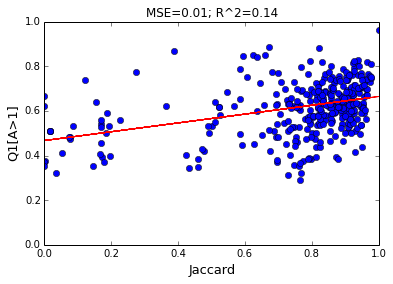

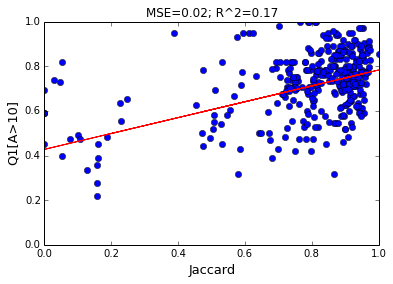

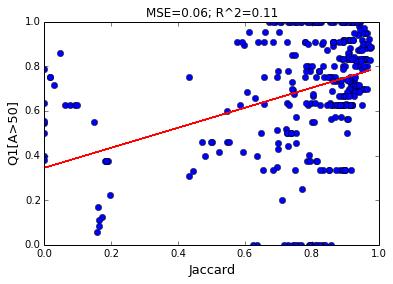

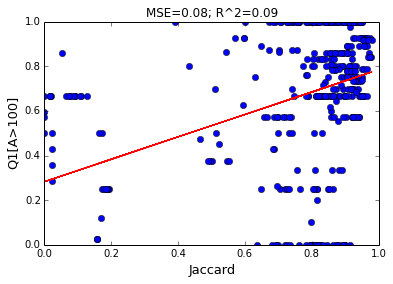

In [70]:
for astar in [1,10,50,100]:
    regression_results( ["Jaccard"],["Q1[A>{}]".format(astar)],PLOT=True)

---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<1]']
Coefficients:  [[ 0.14642571]]
Mean squared error: 0.01
R^2: 0.10
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<10]']
Coefficients:  [[ 0.14350339]]
Mean squared error: 0.01
R^2: 0.12
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<50]']
Coefficients:  [[ 0.15505009]]
Mean squared error: 0.01
R^2: 0.07
---------------------------------------------
Regression x=['Jaccard'];y=['Q2[A<100]']
Coefficients:  [[ 0.16350356]]
Mean squared error: 0.01
R^2: 0.04


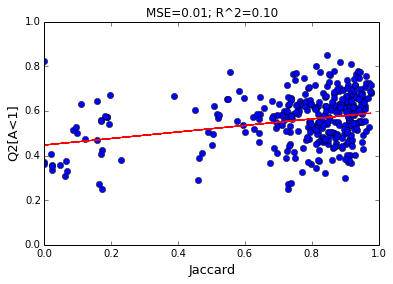

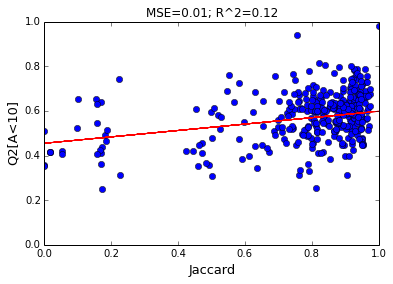

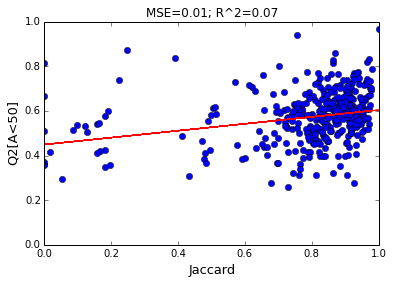

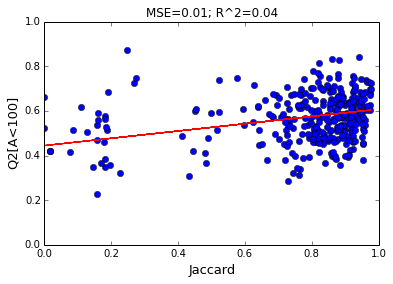

In [68]:
for astar in [1,10,50,100]:
    regression_results( ["Jaccard"],["Q2[A<{}]".format(astar)],PLOT=True)

### Error rate in retreiving good and bad workers as a function of a*

A worker is defined as a good worker if jaccard > 0.5

In [95]:
df["goodworker"]=df["Jaccard"]>0.5

In [96]:
# Ngoodworkers=df[df["Jaccard"]>0.5].count(axis=0)[0]

In [113]:
p_lst = []
r_lst=[]
astar_lst=[1,10,50,100]
for astar in astar_lst:
    true_positives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==True)])
    false_negatives = len(df[(df["Q1[A>{}]".format(astar)]<0.7)&(df["goodworker"]==True)])
    false_positives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==False)])
    true_negatives = len(df[(df["Q1[A>{}]".format(astar)]>0.7)&(df["goodworker"]==False)])
    precision = true_positives/float(true_positives+false_positives)
    recall = true_positives/float(true_positives+false_negatives)
    p_lst.append(precision)
    r_lst.append(recall)

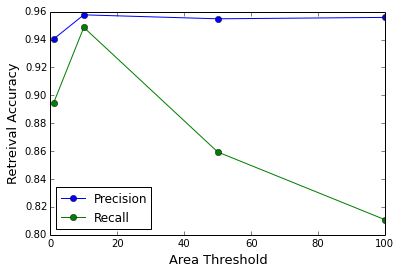

In [111]:
plt.plot(astar_lst,p_lst,'o-',label="Precision")
plt.plot(astar_lst,r_lst,'o-',label="Recall")
plt.xlabel("Area Threshold",fontsize=13)
plt.ylabel("Retreival Accuracy",fontsize=13)
plt.legend(loc="bottom left",numpoints=1)

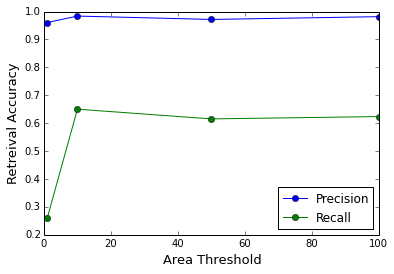

In [114]:
plt.plot(astar_lst,p_lst,'o-',label="Precision")
plt.plot(astar_lst,r_lst,'o-',label="Recall")
plt.xlabel("Area Threshold",fontsize=13)
plt.ylabel("Retreival Accuracy",fontsize=13)
plt.legend(loc="bottom left",numpoints=1)

$\therefore$ maybe we need to explore lower area thresholds 

### Q2 scatterplot after filtering on Q1

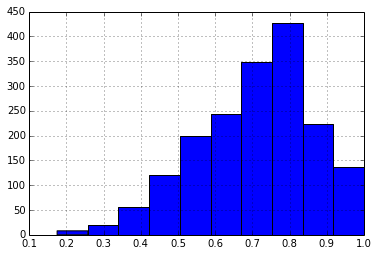

In [127]:
df["Q1[A>10]"].hist()

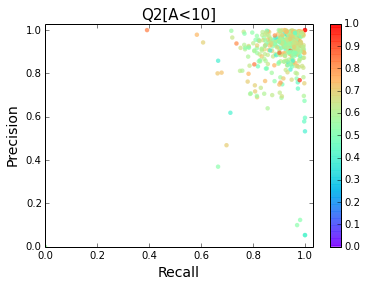

In [133]:
Q1_filtered_df = df[df["Q1[A>10]"]>0.8]
scatterplot(Q1_filtered_df,"Recall","Precision","Q2[A<10]",bucketize=False)

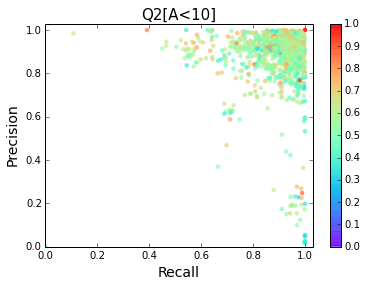

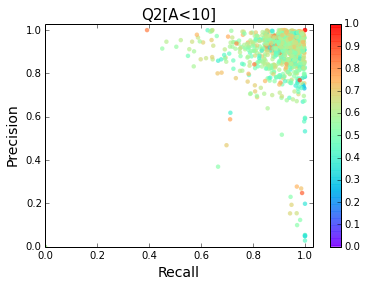

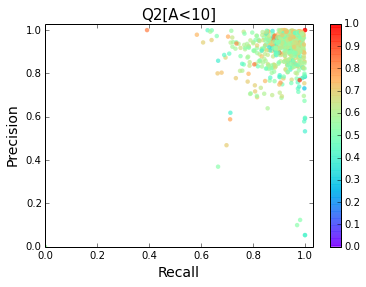

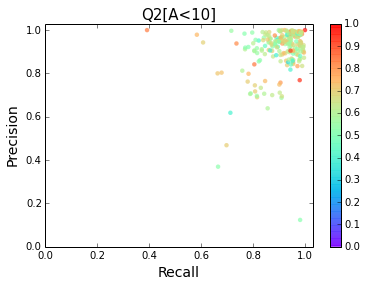

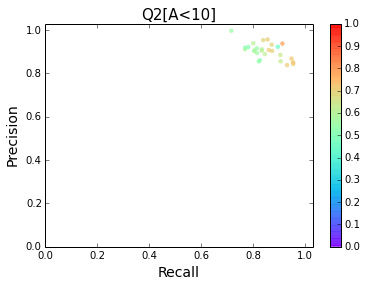

In [235]:
for Q1_thres in np.linspace(0.5,0.99,5):
    Q1_filtered_df = df[df["Q1[A>10]"]>Q1_thres]
    #bucketized_data = bucketize(Q1_filtered_df["Q2[A<10]"],5)
    #scatterplot(Q1_filtered_df,"Recall","Precision","Q2[A<10]",bucketized_data,bucketize=True)
    scatterplot(Q1_filtered_df,"Recall","Precision","Q2[A<10]",bucketize=False)

$\therefore$ as you increase the Q1 threshold,  you are left with pretty good workers, with high Q2 values 

# Showing the Q1,Q2 of good and bad workers (based on Jaccard)

In [229]:
df["goodworker"]=df["Jaccard"]>0.5
df["goodworker"]=  df["goodworker"]*1

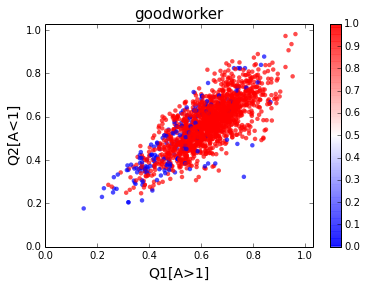

In [230]:
scatterplot(df,"Q1[A>1]","Q2[A<1]","goodworker",bucketize=False,cmap=plt.cm.bwr)

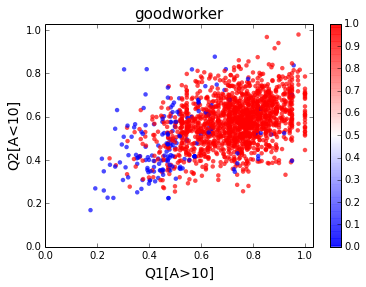

In [214]:
#bucketized_data = bucketize(df["Jaccard"],2)
scatterplot(df,"Q1[A>10]","Q2[A<10]","goodworker",bucketize=False,cmap=plt.cm.bwr)#bucketized_data,bucketize=True)

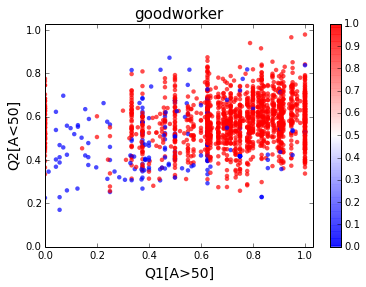

In [215]:
scatterplot(df,"Q1[A>50]","Q2[A<50]","goodworker",bucketize=False,cmap=plt.cm.bwr)

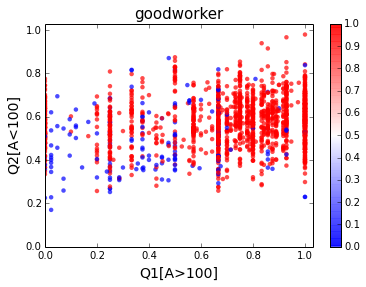

In [216]:
scatterplot(df,"Q1[A>100]","Q2[A<100]","goodworker",bucketize=False,cmap=plt.cm.bwr)